

    Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

    Fake news spreads faster than real news and creates problems and fear among groups and in society.

     address these problems using classical NLP techniques and  classify whether a given message/ text is Real or Fake Message.
    
     use glove embeddings from spacy which is trained on massive wikipedia dataset to pre-process and text vectorization and apply different classification algorithms.


dataset: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset


    This data consists of two columns.

      - Text
      - label

    Text is the statements or messages regarding a particular event/situation.

    label feature tells whether the given text is Fake or Real.

    As there are only 2 classes, this problem comes under the Binary Classification.


In [1]:
import pandas as pd

df = pd.read_csv("Fake_Real_Data.csv")
df.head()


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [2]:
df.shape

(9900, 2)

In [3]:
# class imbalance
df.label.value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [4]:
# convert label column into numbers
df['label_num'] = df['label'].map({'Fake':0, 'Real': 1})
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1




Get spacy word vectors and store them in a pandas dataframe


In [5]:


import spacy
nlp = spacy.load("en_core_web_lg")



In [6]:
doc = nlp("Top Trump Surrogate BRUTALLY Stabs Him In")
doc.vector

array([-2.19270572e-01,  1.52125448e-01, -4.96100122e-03,  1.31342322e-01,
        1.72147915e-01, -5.37058525e-02,  1.57524254e-02,  2.88708620e-02,
        1.91951424e-01,  1.88406122e+00, -1.23005677e-02,  3.15188579e-02,
       -1.35371998e-01, -4.86118312e-04, -6.37954324e-02,  6.07975721e-02,
       -3.80579419e-02,  1.29796728e-01,  8.20702836e-02, -4.40842845e-02,
       -7.65397102e-02, -1.18215568e-01, -4.23578583e-02, -8.57070014e-02,
       -1.39648363e-03,  7.16192797e-02, -1.14292555e-01,  1.45565420e-01,
        8.86508450e-02, -1.73977241e-01, -6.02098592e-02,  1.52735129e-01,
       -1.34748578e-01,  1.02623805e-01,  3.52834851e-01, -2.55936563e-01,
       -1.09647155e-01,  2.62982845e-02, -5.44955730e-02, -1.13351278e-01,
       -1.45067135e-02, -1.06596135e-01, -7.84557015e-02, -1.74430713e-01,
        6.28068522e-02, -9.58082154e-02, -6.44834191e-02, -7.68017098e-02,
       -5.42204306e-02, -5.66065721e-02, -1.99884959e-02,  8.63015652e-02,
       -1.47730038e-01, -

In [7]:
doc.vector.shape

(300,)

In [8]:
df['vector'] = df.Text.apply(lambda x: nlp(x).vector)


In [9]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.103623025, 0.17802684, -0.11873861, -0.034..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-0.0063406364, 0.16712041, -0.06661373, 0.017..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-0.122753024, 0.17192385, -0.024732638, -0.06..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-0.027337318, 0.12501417, -0.0073965387, -0.0..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.032708026, 0.093958504, -0.03287002, -0.00..."


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.vector.values, df.label_num, test_size= 0.2, random_state= 2022)


In [14]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [17]:
from sklearn.metrics import classification_report

y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1024
           1       0.95      0.95      0.95       956

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



In [18]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors= 5, metric= 'euclidean')

clf.fit(X_train_2d, y_train)

y_pred = clf.predict(X_test_2d)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1024
           1       0.97      0.99      0.98       956

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



confusion matrix


Text(69.0, 0.5, 'Truth')

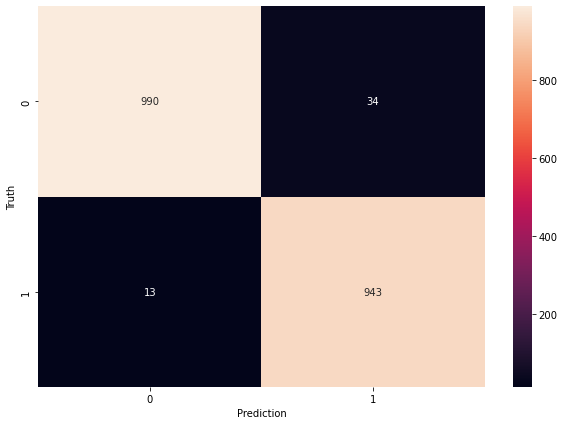

In [19]:
from tokenize import PlainToken
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel("Prediction")
plt.ylabel("Truth")

1. KNN model which didn't perform well in the vectorization techniques like Bag of words, and TF-IDF due to very high dimensional vector space, performed really well with glove vectors due to only 300-dimensional vectors and very good embeddings(similar and related words have almost similar embeddings) for the given text data.

2. MultinomialNB model performed decently well but did not come into the top list because in the 300-dimensional vectors we also have the negative values present. The Naive Bayes model does not fit the data if there are negative values. So, to overcome this shortcoming, we have used the Min-Max scaler to bring down all the values between 0 to 1. In this process, there will be a possibility of variance and information loss among the data. But anyhow we got a decent recall and f1 scores.